<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Обзор-и-предобработка-данных" data-toc-modified-id="Обзор-и-предобработка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Обзор и предобработка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-соотношения-видов-объектов-общественного-питания-по-количеству" data-toc-modified-id="Анализ-соотношения-видов-объектов-общественного-питания-по-количеству-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ соотношения видов объектов общественного питания по количеству</a></span></li><li><span><a href="#Анализ-соотношения-сетевых-и-несетевых-заведений-по-количеству" data-toc-modified-id="Анализ-соотношения-сетевых-и-несетевых-заведений-по-количеству-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ соотношения сетевых и несетевых заведений по количеству</a></span></li><li><span><a href="#Анализ-сетевых-заведений" data-toc-modified-id="Анализ-сетевых-заведений-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Анализ сетевых заведений</a></span></li><li><span><a href="#Анализ-среднего-числа-посадочных-мест" data-toc-modified-id="Анализ-среднего-числа-посадочных-мест-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Анализ среднего числа посадочных мест</a></span></li><li><span><a href="#Анализ-местоположения-заведений" data-toc-modified-id="Анализ-местоположения-заведений-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Анализ местоположения заведений</a></span></li><li><span><a href="#Анализ-распределения-количества-посадочных-мест-для-улиц-с-большим-количеством-заведений" data-toc-modified-id="Анализ-распределения-количества-посадочных-мест-для-улиц-с-большим-количеством-заведений-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Анализ распределения количества посадочных мест для улиц с большим количеством заведений</a></span></li></ul></li><li><span><a href="#Общие-выводы" data-toc-modified-id="Общие-выводы-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Общие выводы</a></span></li></ul></div>

# Исследование рынка заведений общественного питания Москвы

Вы решили открыть небольшое кафе в Москве. Оно оригинальное — гостей должны обслуживать роботы. Проект многообещающий, но дорогой. Вместе с партнёрами вы решились обратиться к инвесторам. Их интересует текущее положение дел на рынке — сможете ли вы снискать популярность на долгое время, когда все зеваки насмотрятся на роботов-официантов?

Партнёры просят вас подготовить исследование рынка. У вас есть открытые данные о заведениях общественного питания в Москве.

<div style="border:solid black 1px; padding: 20px">

**Описание данных**
    
Датафрейм `rest_data`:
- `id` — идентификатор объекта;
- `object_name` — название объекта общественного питания;
- `chain` — сетевой ресторан;
- `object_type` — тип объекта общественного питания;
- `address` — адрес;
- `number` — количество посадочных мест.

</div>

In [1]:
# импортируем необходимые библиотеки
import pandas as pd              
import matplotlib.pyplot as plt
import seaborn as sns

import requests                  # библиотека нужна для обращения к API
import json                      # библиотека нужна для конвертации XML в JSON
from io import BytesIO

In [2]:
pd.set_option('display.max_columns', None)  # сброс ограничений на количество выводимых столбцов
pd.set_option('display.max_rows', None)     # сброс ограничений на количество выводимых строк
pd.set_option('display.max_colwidth', None) # сброс ограничений на количество символов в записи

## Обзор и предобработка данных

In [3]:
# чтение данных из файла и сохранение в rest_data
rest_data = pd.read_csv('/datasets/rest_data.csv')

display(rest_data.head(10))   # вывод первых 10 строк
display(rest_data.describe()) # вывод описательной статистики
display(rest_data.info())     # получение общей информации о данных

,id,object_name,chain,object_type,address,number
0,151635,СМЕТАНА,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48
1,77874,Родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35
2,24309,Кафе «Академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95
3,21894,ПИЦЦЕТОРИЯ,да,кафе,"город Москва, Абрамцевская улица, дом 1",40
4,119365,Кафе «Вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50
5,27429,СТОЛ. ПРИ ГОУ СОШ № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240
6,148815,Брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10
7,20957,Буфет МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90
8,20958,КПФ СЕМЬЯ-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150
9,28858,Столовая МТУСИ,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120


,id,number
count,15366.000000,15366.000000
mean,119720.066901,59.547182
std,73036.130732,74.736833
min,838.000000,0.000000
25%,28524.000000,12.000000
50%,144974.500000,40.000000
75%,184262.250000,80.000000
max,223439.000000,1700.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15366 entries, 0 to 15365
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           15366 non-null  int64 
 1   object_name  15366 non-null  object
 2   chain        15366 non-null  object
 3   object_type  15366 non-null  object
 4   address      15366 non-null  object
 5   number       15366 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 720.4+ KB


None

In [4]:
# проверка на наличие дубликатов
rest_data.duplicated().sum()

0

<div class="alert alert-block alert-info">
<font color='Black'>

Датафрейм `rest_data` содержит 15 366 строк и 6 столбцов. 

Наименования столбцов отражают суть, содержащихся в них данных. Встречающиеся типы данных - целые числа и строковые значения. 

Видим, что пропущенные значения и явные дубликаты в `rest_data` отсутствуют.  
    
Заметим, что минимальное число посадочных мест равно `0`, возможно определенные типы объектов общественного питания не имеют посдаочных мест, изучим строки с нулевым значением посадочных мест подробнее.    

In [5]:
# выведем уникальные значения числа посадочных мест
rest_data['number'].sort_values().unique()

array([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
         11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
         22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
         33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
         44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
         55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
         66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
         77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
         88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
         99,  100,  101,  102,  103,  104,  105,  106,  107,  108,  109,
        110,  111,  112,  113,  114,  115,  116,  118,  119,  120,  121,
        122,  123,  124,  125,  126,  127,  128,  130,  131,  132,  133,
        134,  135,  136,  138,  139,  140,  141,  142,  143,  144,  145,
        146,  147,  148,  149,  150,  151,  152,  1

In [6]:
# сгруппируем объекты с нулевым количеством посадочных мест по типу объекта
rest_data[rest_data['number'] == 0].groupby('object_type', as_index=False).agg({'id':'count'})

,object_type,id
0,бар,28
1,буфет,68
2,закусочная,189
3,кафе,310
4,кафетерий,113
5,магазин (отдел кулинарии),145
6,предприятие быстрого обслуживания,704
7,ресторан,45
8,столовая,19


<div class="alert alert-block alert-info">
<font color='Black'>

Среди объектов с нулевым значением посадочных мест вызывают подозрение такие типы заведений как кафе, ресторан, столовая, посмотрим данные строки подробнее.

In [7]:
# отобразим кафе с нулевым количеством посадочных мест 
rest_data[(rest_data['number'] == 0) & (rest_data['object_type']  == 'кафе')]

,id,object_name,chain,object_type,address,number
577,149220,Кофейня «Кофе Хаус»,да,кафе,"город Москва, Павелецкая площадь, дом 1А, строение 1",0
802,142581,Кофе Энигма,нет,кафе,"город Москва, Овчинниковская набережная, дом 22/24, строение 1",0
1148,155495,Суши Wok,да,кафе,"город Москва, Таганская улица, дом 31/22",0
2750,152207,Правда кофе,нет,кафе,"город Москва, Нижняя Красносельская улица, дом 5, строение 1",0
2995,156171,ДонерОК,нет,кафе,"город Москва, Кронштадтский бульвар, дом 3, строение 3",0
4985,157816,Пунш Мастер,нет,кафе,"город Москва, Нижняя Красносельская улица, дом 35, строение 59",0
4987,157819,Лес,нет,кафе,"город Москва, Нижняя Красносельская улица, дом 35, строение 59",0
4988,157820,Кухни Кипра,нет,кафе,"город Москва, Нижняя Красносельская улица, дом 35, строение 59",0
4989,157821,OK Food Story,нет,кафе,"город Москва, Нижняя Красносельская улица, дом 35, строение 59",0
4991,157823,Maison declaiz,нет,кафе,"город Москва, Нижняя Красносельская улица, дом 35, строение 59",0


In [8]:
# отобразим рестораны с нулевым количеством посадочных мест 
rest_data[(rest_data['number'] == 0) & (rest_data['object_type']  == 'ресторан')]

,id,object_name,chain,object_type,address,number
1873,79718,Макдоналдс,да,ресторан,"город Москва, поселение Московский, деревня Говорово, дом 1Б/Н",0
4490,152298,Фудмаркет. Яшечкина,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4491,152299,Фудмаркет. Грачева,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4492,152305,Фудмаркет. Шапиро,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4493,152307,Фудмаркет. Салпагарова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4501,152255,Фудмаркет.Швыдкой,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4502,152222,Фудмаркет.Паритова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4503,152224,Фудмаркет. Рогачикова,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
4504,152216,Фудмаркет. Галичкин,нет,ресторан,"город Москва, улица Новый Арбат, дом 21",0
6113,27193,МАКСИМАЛЬНЫЙ РЕСТОРАН,нет,ресторан,"город Москва, Профсоюзная улица, дом 61А",0


In [9]:
# отобразим столовые с нулевым количеством посадочных мест 
rest_data[(rest_data['number'] == 0) & (rest_data['object_type']  == 'столовая')]

,id,object_name,chain,object_type,address,number
206,150836,ГБОУ Школа №1468,нет,столовая,"город Москва, Волгоградский проспект, дом 17, строение 1",0
2101,29844,Вкусный выбор,нет,столовая,"город Москва, аллея Жемчуговой, дом 1А",0
2130,152335,Пищеблок ( закрытое),нет,столовая,"город Москва, Ленинский проспект, дом 8, корпус 23",0
2675,23137,Самса Хаус,нет,столовая,"город Москва, Широкая улица, дом 12",0
4176,150827,ГБОУ Школа №498,нет,столовая,"город Москва, улица Малые Каменщики, дом 18",0
4701,150840,ГБОУ Школа №2104,нет,столовая,"город Москва, Николоямская улица, дом 15",0
4736,150823,ГБОУ Школа №480 им.В.В. Талалихина,нет,столовая,"город Москва, Стройковская улица, дом 5",0
4737,150838,ГБОУ Школа №1468,нет,столовая,"город Москва, Рабочая улица, дом 10",0
4739,150833,ГБОУ Школа №1468,нет,столовая,"город Москва, Рабочая улица, дом 35, корпус 2",0
4740,150835,ГБОУ Школа №1468,нет,столовая,"город Москва, Вековая улица, дом 10",0


<div class="alert alert-block alert-info">
<font color='Black'>

Видим, что среди ресторанов и кафе встречаются заведения, имеющие один и тот же адрес (например, город Москва, улица Новый Арбат, дом 21, город Москва, Рождественский бульвар, дом 1), возможно, это фудкорты, имеющие общую зону посадочных мест. Возникают вопросы к корректности типизации заведений. Но поскольку доля объектов с типом кафе, ресторан, столовая и с нулевым значением посадочных мест меньше 3% от общего количества строк в датафрейме, то исключим рассматриваемые объекты из рассмотрения.

In [10]:
# исключим из датафрейма кафе, рестораны и столовые с нулевым количеством посадочных мест 
exception_object_type = ['кафе','ресторан','столовая']
rest_data = rest_data.loc[(rest_data['number'] != 0) | 
                          ( (rest_data['number'] == 0) & 
                           ~(rest_data['object_type'].isin(exception_object_type))
                          )].reset_index(drop=True)
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14992 entries, 0 to 14991
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           14992 non-null  int64 
 1   object_name  14992 non-null  object
 2   chain        14992 non-null  object
 3   object_type  14992 non-null  object
 4   address      14992 non-null  object
 5   number       14992 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 702.9+ KB


<div class="alert alert-block alert-info">
<font color='Black'>

Посмотрим подробнее на значения в столбцах `object_name`, `chain`, `object_type`.

In [11]:
# отобразим количество уникальных значений
rest_data['object_name'].value_counts()

Столовая                                                                                                266
Кафе                                                                                                    230
Шаурма                                                                                                  228
KFC                                                                                                     150
Шоколадница                                                                                             142
Бургер Кинг                                                                                             117
Макдоналдс                                                                                              117
Домино'с Пицца                                                                                           86
Теремок                                                                                                  82
Крошка Картошка             

In [12]:
# отобразим количество уникальных значений
rest_data['chain'].value_counts()

нет    12097
да      2895
Name: chain, dtype: int64

In [13]:
# отобразим количество уникальных значений
rest_data['object_type'].value_counts()

кафе                                 5789
столовая                             2568
ресторан                             2240
предприятие быстрого обслуживания    1923
бар                                   856
буфет                                 585
кафетерий                             398
закусочная                            360
магазин (отдел кулинарии)             273
Name: object_type, dtype: int64

In [14]:
# для удобства отображения типов объектов на графиках 
# переименуем предприятие быстрого обслуживания в фастфуд
# и магазин (отдел кулинарии) в кулинария

rest_data.loc[rest_data['object_type'] == 'предприятие быстрого обслуживания','object_type'] = 'фастфуд'
rest_data.loc[rest_data['object_type'] == 'магазин (отдел кулинарии)','object_type'] = 'кулинария'

<div class="alert alert-block alert-info">
<font color='Black'>

В столбце `object_name` видим невяные дубликаты, например, Макдоналдс и МАКДОНАЛДС, приведем наименования объектов к нижнему регистру. 
 
Также имеются неявные дубликаты вида: Кофейня ШОКОЛАДНИЦА, Шоколадница, Кафе «Шоколадница» и другие, поскольку для целей исследования столбец с наименованием объекта не сильно важен, оставим указанные дубликаты без изменений.

In [15]:
# приведем наименования объектов object_name к нижнему регистру
rest_data['object_name'] = rest_data['object_name'].str.lower()
# отобразим количество уникальных значений
rest_data['object_name'].value_counts()

столовая                                                                                                320
кафе                                                                                                    272
шаурма                                                                                                  244
шоколадница                                                                                             158
kfc                                                                                                     150
макдоналдс                                                                                              145
бургер кинг                                                                                             132
теремок                                                                                                  92
домино'с пицца                                                                                           90
крошка картошка             

<div style="border:solid green 3px; padding: 20px">
    
**Промежуточный вывод**

Датафрейм `rest_data` содержит 15 366 строк и 6 столбцов. 

Наименования столбцов отражают суть, содержащихся в них данных. Встречающиеся типы данных - целые числа и строковые значения. 

Исключили из датафрейма заведения с нулевым значением посадочных мест с типом кафе, ресторан, столовая. Привели наименования заведений к нижнему регистру, для удобства использования переименовали названия некоторых типов объектов.
    
</div>

## Анализ данных

### Анализ соотношения видов объектов общественного питания по количеству

<div class="alert alert-block alert-info">
<font color='Black'>

Исследуем соотношение видов объектов общественного питания по количеству.

In [16]:
# сгруппируем объекты по типу и найдем количество объектов для каждого типа
objects_type = (rest_data.groupby('object_type', as_index=False)
                         .agg({'id':'count'})
                         .sort_values(by='id', ascending=False)
                         .rename(columns={'object_type': 'type','id':'count'})
                         .reset_index(drop=True)
               )
objects_type

,type,count
0,кафе,5789
1,столовая,2568
2,ресторан,2240
3,фастфуд,1923
4,бар,856
5,буфет,585
6,кафетерий,398
7,закусочная,360
8,кулинария,273


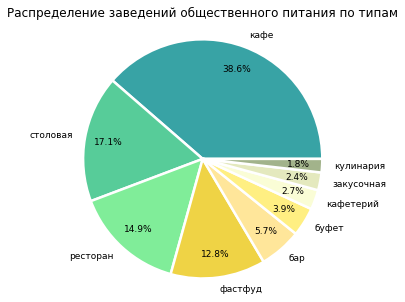

In [17]:
# построим круговую диаграмму распределения объектов по типам
colors = ['#38A3A5', '#57CC99', '#80ED99', 
          '#EFD345', '#FFE69A', '#FFEF82', 
          '#FAFDD6', '#E4E9BE', '#A2B38B',
          '#FFEF82', '#EFD345', '#F1F0C0']

plt.figure(figsize=(8,5))
plt.title('Распределение заведений общественного питания по типам')

plt.pie(objects_type['count'], 
        labels=objects_type['type'], 
        labeldistance=1.1, 
        wedgeprops = {'linewidth' : 2.5, 'edgecolor' : 'white'}, 
        autopct='%.1f%%', 
        pctdistance = 0.8,
        radius=1.1,
        textprops={'fontsize': 9},
        colors=colors)

plt.show()
#plt.savefig('1_objects_type.png', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

В имеющихся данных наибольшую долю составляют следующие типы объектов: кафе - 38,6%,  столовые - 17,1%, рестораны - 12,8%, фастфуды - 12,8%. Наименьшую долю составляют следующие типы объектов: кафетерии, закусочные и кулинарии, доля каждого из них меньше 3%.

### Анализ соотношения сетевых и несетевых заведений по количеству

<div class="alert alert-block alert-info">
<font color='Black'>

Исследуем соотношение сетевых и несетевых заведений по количеству.    

In [18]:
# сгруппируем объекты по сетевому признаку
chain_type = (rest_data.groupby('chain', as_index=False)
                         .agg({'id':'count'})
                         .sort_values(by='id', ascending=False)
                         .rename(columns={'chain': 'chain_type','id':'count'})
                         .reset_index(drop=True)
               )
chain_type

,chain_type,count
0,нет,12097
1,да,2895


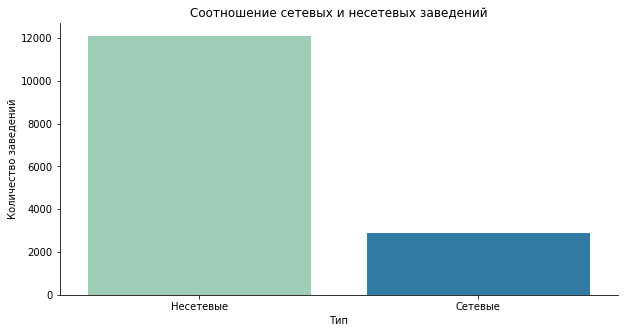

In [19]:
# построим столбчатую диаграмму распределения объектов по сетевому признаку
chain_dict = {'да':'Сетевые', 'нет':'Несетевые'}

plt.figure(figsize=(10,5))
plt.title('Соотношение сетевых и несетевых заведений')

sns.barplot(x=chain_type['chain_type'].apply(lambda x: chain_dict[x]), 
            y=chain_type['count'], data=chain_type, palette='YlGnBu')
sns.despine()

plt.xlabel('Тип')
plt.ylabel('Количество заведений')

plt.show()
#plt.savefig('2_chain_type.jpeg', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

В исследуемых данных значительно больше несетевых заведений.
    
Исследуем виды объектов общественного питания с сетевым и несетевым распространением.    

In [20]:
# сгруппируем объекты по типу и по сетевому признаку
# и найдем количество объектов для каждой группы
objects_chain_type = (rest_data
                      .groupby(['object_type','chain'], as_index=False).agg({'id':'count'})
                      .rename(columns={'object_type':'type', 'chain':'chain_type', 'id':'count'})
                     )
objects_chain_type

,type,chain_type,count
0,бар,да,37
1,бар,нет,819
2,буфет,да,11
3,буфет,нет,574
4,закусочная,да,56
5,закусочная,нет,304
6,кафе,да,1341
7,кафе,нет,4448
8,кафетерий,да,52
9,кафетерий,нет,346


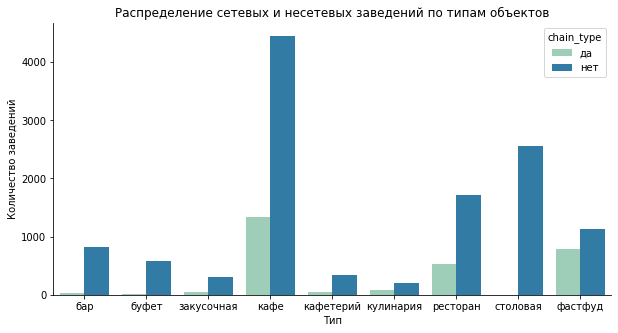

In [21]:
# построим столбчатую диаграмму распределения объектов по типам и по сетевому признаку
plt.figure(figsize=(10,5))
plt.title('Распределение сетевых и несетевых заведений по типам объектов')
sns.barplot(x='type', 
            y='count', 
            data=objects_chain_type, 
            hue='chain_type',
            palette='YlGnBu')
sns.despine()
plt.xlabel('Тип')
plt.ylabel('Количество заведений')

plt.show()
#plt.savefig('3_objects_chain_type.jpeg', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

Среди сетевых заведений наиболее распространены кафе, фастфуды и рестораны, в то же время среди несетевых заведений наиболее популярны кафе, столовые и рестораны.     

### Анализ сетевых заведений

<div class="alert alert-block alert-info">
<font color='Black'>

Исследуем объекты с сетевым распространением.    

In [22]:
# для сетевых заведений найдем долю каждого вида объекта от общего количества объектов
objects_chain_ratio = (objects_chain_type[objects_chain_type['chain_type'] == 'да'][['type','count']]
                       .merge(objects_chain_type.groupby('type', as_index=False).agg({'count':'sum'}), 
                              on='type', 
                              suffixes=('_chain', '_all')
                             )
                      )

objects_chain_ratio['ratio_%'] = round(objects_chain_ratio['count_chain'] / 
                                       objects_chain_ratio['count_all'] * 100, 1)

objects_chain_ratio = objects_chain_ratio.sort_values(by='ratio_%', ascending=False).reset_index(drop=True)
objects_chain_ratio

,type,count_chain,count_all,ratio_%
0,фастфуд,791,1923,41.1
1,кулинария,78,273,28.6
2,ресторан,526,2240,23.5
3,кафе,1341,5789,23.2
4,закусочная,56,360,15.6
5,кафетерий,52,398,13.1
6,бар,37,856,4.3
7,буфет,11,585,1.9
8,столовая,3,2568,0.1


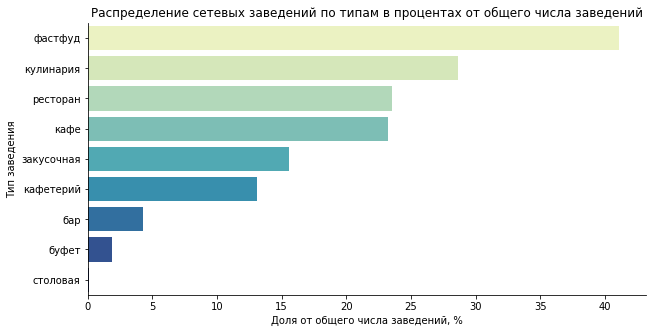

In [23]:
# построим столбчатую диаграмму распределения сетевых объектов по типам 
# в процентах от общего количества объектов
plt.figure(figsize=(10,5))
plt.title('Распределение сетевых заведений по типам в процентах от общего числа заведений')

sns.barplot(x='ratio_%', 
            y='type', 
            data=objects_chain_ratio, 
            palette='YlGnBu')
sns.despine()

plt.xlabel('Доля от общего числа заведений, %')
plt.ylabel('Тип заведения')

plt.show()
#plt.savefig('4_objects_chain_ratio.png', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

Наибольшая доля сетевых заведений от общего количества заведений приходится на фастфуды (41,1%), далее идет кулинария (28,6%), рестораны (23,5%) и кафе (23,2%). Сетевых столовых, буфетов и баров очень мало.
    
Исследуем распределение посадочных мест для объектов общественного питания с сетевым распространением.    

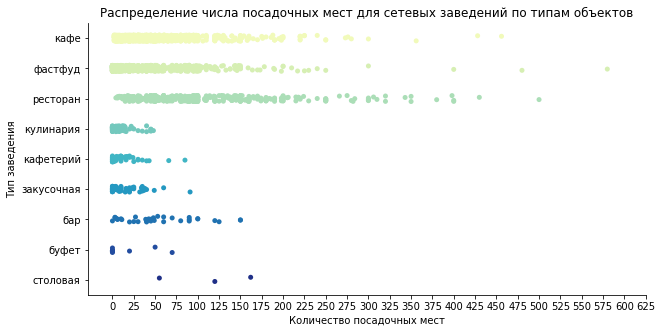

In [24]:
# построим диаграмму распределения числа посадочных мест в сетевых объектах по типам 
plt.figure(figsize=(10,5))
plt.title('Распределение числа посадочных мест для сетевых заведений по типам объектов')

sns.stripplot(x='number', y='object_type', data=rest_data.query('chain == "да"'), palette='YlGnBu')
sns.despine()

plt.xlabel('Количество посадочных мест')
plt.ylabel('Тип заведения')
plt.xticks(range(0,650,25))

plt.show()
#plt.savefig('5_chain_number_seats.png', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

Для сетевых кафе, фастфудов и ресторанов имеем большое количество заведений с числом посадочных мест до 150, после данной границы количество заведений уменьшается с увеличением числа посадочных мест. Сетевые кулинарии, кафетерии и закусочные имеют, как правило, до 50 посадочных мест. В сетевых барах диапазон числа посадочных мест составляет от 0 до 150. Сетевых буфетов и столовых очень мало, поэтому по ним сложно сделать какие-то выводы относительно числа посадочных мест. 

### Анализ среднего числа посадочных мест

<div class="alert alert-block alert-info">
<font color='Black'>

Проанализируем среднее число посадочных мест в разрезе типов объектов общественного питания.    

In [25]:
# сгруппируем объекты по типам и для каждой группы найдем среднее число посадочных мест
objects_mean_number = (rest_data.groupby('object_type', as_index=False)
                           .agg({'number':'mean'})
                           .rename(columns={'object_type':'type', 'number':'mean_number_seats'})
                           .sort_values(by='mean_number_seats', ascending=False)
                           .reset_index(drop=True)
                       )
objects_mean_number

,type,mean_number_seats
0,столовая,131.210280
1,ресторан,98.779464
2,буфет,51.129915
3,бар,43.494159
4,кафе,41.842805
5,фастфуд,20.552262
6,кафетерий,9.123116
7,закусочная,7.608333
8,кулинария,5.589744


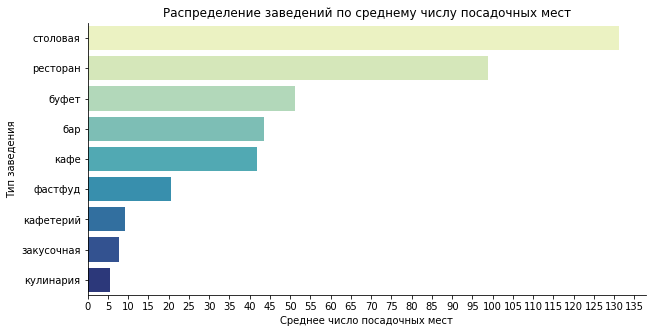

In [26]:
# построим диаграмму распределения среднего числа посадочных мест в объектах по типам 
plt.figure(figsize=(10,5))
plt.title('Распределение заведений по среднему числу посадочных мест')

sns.barplot(x='mean_number_seats', 
            y='type', 
            data=objects_mean_number, 
            palette='YlGnBu')
sns.despine()

plt.xlabel('Среднее число посадочных мест')
plt.ylabel('Тип заведения')
plt.xticks(range(0,140,5))

plt.show()
#plt.savefig('6_mean_seats.png', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

Наибольшее среднее число посадочных мест приходится на столовые (131), на втором месте - рестораны (99), на третьем месте - буфеты (51). Наименьшее среднее число посадочных мест приходится на кафетерии, закусочные и кулинарии - меньше 10 посадочных мест для каждого типа, что в целом соответствует типу заведений.


### Анализ местоположения заведений

<div class="alert alert-block alert-info">
<font color='Black'>

Выделим в отдельный столбец информацию об улице из столбца `address`.  

In [27]:
# разделим адрес на составляющие методом split, в качестве разделителя используем "," 
# так как название улицы может находится в разных частях адреса, 
# то используя дополнительный список с типами улиц, найдем часть, содержашую наименование улицы,
# учтем особенности административного деления Москвы:
# для Зеленоградского АО - имеются улицы в общем понимании 
# и корпуса, в номерах которых содержится номер микрорайона и номер дома,
# для городов в составе Москвы - отдельно выделим город и улицу,
# для поселений - отдельно выделим входящие в состав поселений деревни/посёлки

county_type = ['Зеленоград', 'Московский', 'Троицк', 'Щербинка', 'поселение']
street_type = ['аллея', 'бульвар', 'бул.', 'б-р', 'вал', 'взвоз', 'въезд', 'дорога', 'дор.', 'заезд', 'квартал',
               'километр', 'кольцо', 'магистраль', 'маг.', 'микрорайон', 'линия', 'набережная', 'наб.', 'переулок', 
               'пер.', 'площадь', 'пл.', 'Проезд', 'проезд', 'посёлок', 'пр.', 'просек', 'проспект', 'просп.', 'пр-кт', 
               'проулок', 'спуск', 'съезд', 'территория', 'тракт', 'тупик', 'туп.', 'улица', 'ул.', 'шоссе']

def street_name(row):
    '''функция, выделяющая наименование улицы из столбца с адресом,
       если удается успешно выделить улицу, то возвращается наименование улицы,
       иначе возвращается ошибка'''
    
    # делим строку с адресом на части 
    address = row['address'].split(', ')
    
    for i in range(len(address)):
        # если адрес содержит наименование 'Зеленоград'
        if county_type[0] in address[i]:
            # если в части адреса, следующей за частью, содержащей 'Зеленоград'
            # возможно выделить типичное наименование улицы, то выделяем его
            for item in street_type: 
                if item in address[i+1]: 
                    # возвращаем наименование 'Зеленоград' + наименование типичной улицы
                    return (address[i] + ', ' + address[i+1])
                
            # если в части адреса, следующей за частью, содержащей 'Зеленоград'
            # нет типичного наименования улицы, то выделяем корпус с номером микрорайона,
            # отсекая двузначный номер дома, либо отсекая двузначный номер дома + буквенное обозначение
            if address[i+1][-1:].isnumeric() == True:
                return (address[i] + ', ' + address[i+1][:-2]) 
            else:
                return (address[i] + ', ' + address[i+1][:-3])
        
        # если адрес содержит наименование 'Московский', 'Троицк', 'Щербинка'
        # то возвращаем наименование города + следующую часть адреса
        if ((county_type[1] in address[i]) or 
            (county_type[2] in address[i]) or 
            (county_type[3] in address[i])):
            return (address[i] + ', ' + address[i+1])
        
        # если адрес содержит наименование 'поселение',
        # то возвращаем наименование поселения + следующую часть адреса
        if county_type[4] in address[i]:
            return (address[i] + ', ' + address[i+1])
        
        # выделяем типичное наименование улицы
        for item in street_type: 
            if item in address[i]: 
                return address[i]
            
    # возвращаем 'error', если не удалось выделить наименование улицы        
    return 'error'
    
rest_data['street'] = rest_data.apply(street_name, axis=1)  
display(rest_data.head(10))
display(rest_data.tail(10))
print('Количество строк с ошибками в определении улицы ',rest_data[rest_data['street'] == 'error']['id'].count())

,id,object_name,chain,object_type,address,number,street
0,151635,сметана,нет,кафе,"город Москва, улица Егора Абакумова, дом 9",48,улица Егора Абакумова
1,77874,родник,нет,кафе,"город Москва, улица Талалихина, дом 2/1, корпус 1",35,улица Талалихина
2,24309,кафе «академия»,нет,кафе,"город Москва, Абельмановская улица, дом 6",95,Абельмановская улица
3,21894,пиццетория,да,кафе,"город Москва, Абрамцевская улица, дом 1",40,Абрамцевская улица
4,119365,кафе «вишневая метель»,нет,кафе,"город Москва, Абрамцевская улица, дом 9, корпус 1",50,Абрамцевская улица
5,27429,стол. при гоу сош № 1051,нет,столовая,"город Москва, Абрамцевская улица, дом 15, корпус 1",240,Абрамцевская улица
6,148815,брусника,да,кафе,"город Москва, переулок Сивцев Вражек, дом 6/2",10,переулок Сивцев Вражек
7,20957,буфет мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",90,Авиамоторная улица
8,20958,кпф семья-1,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",150,Авиамоторная улица
9,28858,столовая мтуси,нет,столовая,"город Москва, Авиамоторная улица, дом 8, строение 1",120,Авиамоторная улица


,id,object_name,chain,object_type,address,number,street
14982,220618,шоколадница,да,кафе,"город Москва, Митинская улица, дом 36, корпус 1",100,Митинская улица
14983,218692,шоколадница,да,кафе,"город Москва, площадь Джавахарлала Неру, дом 1",30,площадь Джавахарлала Неру
14984,213724,шоколадница,да,кафе,"город Москва, Варшавское шоссе, дом 87Б",54,Варшавское шоссе
14985,222077,кофейня «шоколадница»,да,кафе,"город Москва, Кантемировская улица, дом 47",72,Кантемировская улица
14986,219759,шоколадница,да,кафе,"город Москва, улица Вавилова, дом 3",36,улица Вавилова
14987,208537,шоколадница,да,кафе,"город Москва, 3-й Крутицкий переулок, дом 18",50,3-й Крутицкий переулок
14988,209264,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",10,улица Земляной Вал
14989,209186,шоколадница,да,кафе,"город Москва, улица Земляной Вал, дом 33",20,улица Земляной Вал
14990,221900,шоколадница,да,кафе,"город Москва, поселение Московский, Киевское шоссе, 22-й километр, домовладение 4, строение 1",36,"поселение Московский, Киевское шоссе"
14991,222535,шоколадница,да,кафе,"город Москва, Ходынский бульвар, дом 4",10,Ходынский бульвар


Количество строк с ошибками в определении улицы  0


In [28]:
# сгруппируем объекты по улицам, на которых они расположены, и найдем топ-10 улиц по количеству объектов
top_10_street_objects = (rest_data.groupby('street', as_index=False).agg({'id':'count'})
                                  .rename(columns={'id':'count'})
                                  .sort_values(by='count', ascending=False)
                                  .reset_index(drop=True)
                                  .head(10)
                        )
top_10_street_objects

,street,count
0,проспект Мира,202
1,Ленинградский проспект,172
2,Профсоюзная улица,164
3,Пресненская набережная,163
4,Варшавское шоссе,161
5,Ленинский проспект,142
6,проспект Вернадского,131
7,Каширское шоссе,112
8,Кировоградская улица,110
9,Кутузовский проспект,102


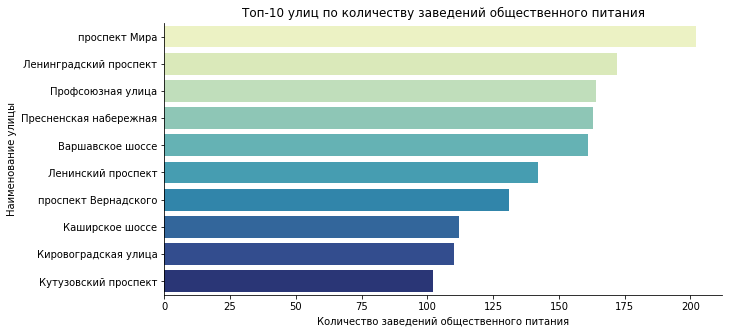

In [29]:
# построим диаграмму распределения количества заведений по улицам
plt.figure(figsize=(10,5))
plt.title('Топ-10 улиц по количеству заведений общественного питания')

sns.barplot(x='count', 
            y='street', 
            data=top_10_street_objects, 
            palette='YlGnBu')
sns.despine()

plt.xlabel('Количество заведений общественного питания')
plt.ylabel('Наименование улицы')

plt.show()
#plt.savefig('7_top_10_street_objects.png', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

На первом месте по количеству заведений общественного питания находится проспект Мира (202), на втором месте - Ленинградский проспект (172), далее следуют Профсоюзная улица (164), Пресненская набережная (163), Варшавское шоссе (161).
    
Для каждой улицы из топ-10 по количеству заведений общественного питания определим район, в котором расположена данная улица. Для этого воспользуемся API Геокодера https://yandex.ru/dev/maps/geocoder/

In [30]:
# полученный ключ для геокодера
# key = '5784ad23-843c-480a-9275-bbfc377c5f48'
# key = '2c0492dd-606d-46df-97f0-6774efc1a371'
# key = 'a7791534-b81d-4256-bb71-913bd67d8936'
key = '9d1bd036-dd60-4622-9617-f15a64d4ad5a'

# параметры запроса, чтобы получать в ответ на запрос json - файл
# определяем формат ответа на запрос
params = { # словарь с параметрами запроса
    "format" : "json", # определяем формат ответа на запрос
}

In [31]:
# зададим функцию, которая на вход будет получать адрес и возвращать район
def mapmaker(address):
    
    #создадим url для запроса координат
    url = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + key + '&geocode=' + address
    
    #сделаем запрос к геокодеру
    response = requests.get(url, params=params)

    #получим координаты точки
    coord = response.json()['response']['GeoObjectCollection']['featureMember'][0]['GeoObject']['Point']['pos']
    
    #создадим url для запроса по координатам
    url_coord = 'https://geocode-maps.yandex.ru/1.x/?apikey=' + key + '&geocode=' + coord
    
    #делаем запрос по координатам
    response_coord = requests.get(url_coord, params=params)
    
    #получаем район из результатов запроса
    try:
        district = (response_coord.json()['response']
                                         ['GeoObjectCollection']
                                         ['featureMember'][2]
                                         ['GeoObject']
                                         ['metaDataProperty']
                                         ['GeocoderMetaData']
                                         ['AddressDetails']
                                         ['Country']
                                         ['AdministrativeArea']
                                         ['Locality']
                                         ['DependentLocality']
                                         ['DependentLocality']
                                         ['DependentLocalityName']
                   )
    except:
        district = 'Не определен'
    
    return district

In [32]:
# создадим датафрейм rest_data_top_10_streets, который будет содержать объекты,
# расположенные на улицах, входящих в топ-10 улиц по количеству объектов
rest_data_top_10_streets = (rest_data[rest_data['street']
                            .isin(top_10_street_objects['street'])]
                            .reset_index(drop=True)
                           )

display(rest_data_top_10_streets.head(10))
print('Количество объектов, расположенных на улицах, входящих в топ-10 по количеству заведений: ',
       rest_data_top_10_streets.shape[0])

,id,object_name,chain,object_type,address,number,street
0,155973,кафе «андерсон»,да,кафе,"город Москва, Варшавское шоссе, дом 2",150,Варшавское шоссе
1,23618,кафе «subway»,да,кафе,"город Москва, Варшавское шоссе, дом 7, корпус 1",36,Варшавское шоссе
2,155852,кафе «ламаджо»,нет,кафе,"город Москва, Варшавское шоссе, дом 29",30,Варшавское шоссе
3,152556,шаурма в пите,нет,фастфуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе
4,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе
5,26279,ресторан «макдоналдс»,да,кафе,"город Москва, Варшавское шоссе, дом 143А",70,Варшавское шоссе
6,141687,пироговая рогова,нет,кафе,"город Москва, проспект Вернадского, дом 9/10",42,проспект Вернадского
7,148853,кафе контдитерская кузина,нет,кафе,"город Москва, проспект Вернадского, дом 11/19",5,проспект Вернадского
8,149149,суши wok,да,кафе,"город Москва, проспект Вернадского, дом 11/19",8,проспект Вернадского
9,128511,аморе,нет,кафе,"город Москва, проспект Вернадского, дом 11/19",10,проспект Вернадского


Количество объектов, расположенных на улицах, входящих в топ-10 по количеству заведений:  1459


In [33]:
# сохраняем результаты запроса
#tmp = rest_data_top_10_streets.loc[1390:1458]['address'].apply(mapmaker)
#tmp.to_csv('part_5.csv')

In [34]:
#tmp1 = pd.read_csv('part_1.csv')
#tmp1 = tmp1.set_index('Unnamed: 0')

In [35]:
# объединяем результаты запроса и сохраняем их в csv-файл
#part_all = pd.concat([tmp1, tmp2, tmp3, tmp4, tmp5], axis=0)
#part_all = part_all.set_index('Unnamed: 0').reset_index(drop=True)
#part_all.to_csv('part_all.csv')

In [36]:
# воспользуемся файлом с предварительно выгруженными районами для датафрейма rest_data_top_10_streets,
# который содержит объекты, расположенные на улицах, входящих в топ-10 улиц по количеству объектов

#https://docs.google.com/spreadsheets/d/1WpXQQyOnpZR81P41ve6-PhI0BUmAbMcYOAv5Z0lzXQU/edit?usp=sharing

spreadsheet_id = '1WpXQQyOnpZR81P41ve6-PhI0BUmAbMcYOAv5Z0lzXQU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts_top_10_streets = pd.read_csv(BytesIO(r.content))

districts_top_10_streets = (districts_top_10_streets.set_index('Unnamed: 0')
                                                    .reset_index(drop=True)
                                                    .rename(columns={'address':'district'})
                            )

# добавим столбец с районом к датафрейму rest_data_top_10_streets,
# который содержит объекты, расположенные на улицах, входящих в топ-10 улиц по количеству объектов
rest_data_top_10_streets_with_district = rest_data_top_10_streets.join(districts_top_10_streets)

# посмотрим подробнее, по каким улицам и объектам не удалось определить район
(rest_data_top_10_streets_with_district[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен')]
    .groupby('street', as_index=False).agg({'id':'count'}))

,street,id
0,Варшавское шоссе,25
1,Кутузовский проспект,14
2,Ленинградский проспект,7
3,Ленинский проспект,4
4,проспект Мира,14


In [37]:
# посмотрим подробнее записи с улицами, по которым не удалось определить район
rest_data_top_10_streets_with_district[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Варшавское шоссе')]

,id,object_name,chain,object_type,address,number,street,district
3,152556,шаурма в пите,нет,фастфуд,"город Москва, Варшавское шоссе, дом 72, корпус 2",0,Варшавское шоссе,Не определен
4,120658,выпечка,нет,кафетерий,"город Москва, Варшавское шоссе, дом 100",2,Варшавское шоссе,Не определен
203,21476,школа 1073 кдп,нет,столовая,"город Москва, Варшавское шоссе, дом 60, корпус 2",60,Варшавское шоссе,Не определен
209,23709,рок-бар «безумий»,нет,кафе,"город Москва, Варшавское шоссе, дом 83, строение 1",40,Варшавское шоссе,Не определен
610,28512,московский ордена ленина и ордена трудового красного знамени метрополитен имени в.и.ленина,нет,столовая,"город Москва, Варшавское шоссе, дом 93",200,Варшавское шоссе,Не определен
622,29432,мфюа «нано фреш»,нет,столовая,"город Москва, Варшавское шоссе, дом 81, корпус 2",36,Варшавское шоссе,Не определен
642,21677,kfc,да,фастфуд,"город Москва, Варшавское шоссе, дом 87Б",64,Варшавское шоссе,Не определен
643,26887,макдоналдс,да,фастфуд,"город Москва, Варшавское шоссе, дом 87Б",64,Варшавское шоссе,Не определен
663,157008,караоке-бар loft,нет,бар,"город Москва, Варшавское шоссе, дом 71, корпус 3",60,Варшавское шоссе,Не определен
683,26945,ёрш,да,ресторан,"город Москва, Варшавское шоссе, дом 86",98,Варшавское шоссе,Не определен


In [38]:
# адреса расположены в Нагорном районе
rest_data_top_10_streets_with_district.loc[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Варшавское шоссе'), 'district'] = 'Нагорный район'

In [39]:
# посмотрим подробнее записи с улицами, по которым не удалось определить район
rest_data_top_10_streets_with_district[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Кутузовский проспект')]

,id,object_name,chain,object_type,address,number,street,district
543,153543,drake,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 1",60,Кутузовский проспект,Не определен
544,137448,сыроварня,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 1",96,Кутузовский проспект,Не определен
545,144968,the 12 wine bar,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 1",42,Кутузовский проспект,Не определен
546,147847,новые формы,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 3",35,Кутузовский проспект,Не определен
547,152684,нофар,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 3",100,Кутузовский проспект,Не определен
840,166972,здравствуй рыба,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 2",36,Кутузовский проспект,Не определен
910,169383,колбасный цех,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 1",158,Кутузовский проспект,Не определен
911,169406,китайская забегаловка,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 1",140,Кутузовский проспект,Не определен
921,171142,salon,нет,ресторан,"город Москва, Кутузовский проспект, дом 12, строение 2",100,Кутузовский проспект,Не определен
922,171454,wow,нет,кафе,"город Москва, Кутузовский проспект, дом 12, строение 1",200,Кутузовский проспект,Не определен


In [40]:
# адреса расположены в районе Дорогомилово
rest_data_top_10_streets_with_district.loc[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Кутузовский проспект'), 
    'district'] = 'район Дорогомилово'

In [41]:
# посмотрим подробнее записи с улицами, по которым не удалось определить район
rest_data_top_10_streets_with_district[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'проспект Мира')]

,id,object_name,chain,object_type,address,number,street,district
373,22206,кафе «кулинарное чтиво»,нет,кафе,"город Москва, проспект Мира, дом 105",20,проспект Мира,Не определен
374,21238,буфет-раздаточная при оао «московская типография № 2»,нет,буфет,"город Москва, проспект Мира, дом 105",52,проспект Мира,Не определен
376,73514,ресторан «урюк»,да,ресторан,"город Москва, проспект Мира, дом 102, корпус 1",200,проспект Мира,Не определен
378,23054,кафе «музей космонавтики»,нет,кафе,"город Москва, проспект Мира, дом 111",44,проспект Мира,Не определен
383,81498,кафе-ресторан «биф-тайм»,нет,ресторан,"город Москва, проспект Мира, дом 102, строение 1А",95,проспект Мира,Не определен
884,168320,столовая №1,нет,столовая,"город Москва, проспект Мира, дом 102, корпус 1",37,проспект Мира,Не определен
931,171435,крафтовый кофе-бар,нет,кафетерий,"город Москва, проспект Мира, дом 102, корпус 2",0,проспект Мира,Не определен
996,190306,шаурма,нет,закусочная,"город Москва, проспект Мира, дом 102, корпус 1",0,проспект Мира,Не определен
997,186559,вино и гады,нет,кафе,"город Москва, проспект Мира, дом 102, корпус 1",35,проспект Мира,Не определен
1185,198182,вкусная столовая,нет,столовая,"город Москва, проспект Мира, дом 102, корпус 1",15,проспект Мира,Не определен


In [42]:
# адреса расположены в Останкинском районе
rest_data_top_10_streets_with_district.loc[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'проспект Мира'), 
    'district'] = 'Останкинский район'

In [43]:
# посмотрим подробнее записи с улицами, по которым не удалось определить район
rest_data_top_10_streets_with_district[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Ленинградский проспект')]

,id,object_name,chain,object_type,address,number,street,district
578,87660,теремок,да,кафе,"город Москва, Ленинградский проспект, дом 62А",12,Ленинградский проспект,Не определен
579,87664,иль патио,да,ресторан,"город Москва, Ленинградский проспект, дом 62А",60,Ленинградский проспект,Не определен
1125,187002,макдоналдс,да,фастфуд,"город Москва, Ленинградский проспект, дом 62А",138,Ленинградский проспект,Не определен
1252,198181,шоколадница,да,кафе,"город Москва, Ленинградский проспект, дом 62А",73,Ленинградский проспект,Не определен
1421,207428,бургер кинг,да,кафе,"город Москва, Ленинградский проспект, дом 62А",15,Ленинградский проспект,Не определен
1445,207425,kfc,да,ресторан,"город Москва, Ленинградский проспект, дом 62А",50,Ленинградский проспект,Не определен
1446,207422,му-му,да,кафе,"город Москва, Ленинградский проспект, дом 62А",65,Ленинградский проспект,Не определен


In [44]:
# адреса расположены в районе Аэропорт
rest_data_top_10_streets_with_district.loc[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Ленинградский проспект'), 
    'district'] = 'район Аэропорт'

In [45]:
# посмотрим подробнее записи с улицами, по которым не удалось определить район
rest_data_top_10_streets_with_district[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Ленинский проспект')]

,id,object_name,chain,object_type,address,number,street,district
140,26310,talk of the town,нет,ресторан,"город Москва, Ленинский проспект, дом 113/1",90,Ленинский проспект,Не определен
141,23922,жасмин,нет,кафе,"город Москва, Ленинский проспект, дом 121/1, корпус 3",45,Ленинский проспект,Не определен
1011,28172,столовая при рдкб на ленинском,нет,столовая,"город Москва, Ленинский проспект, дом 117, сооружение 1",24,Ленинский проспект,Не определен
1275,217078,freshcafe,нет,бар,"город Москва, Ленинский проспект, дом 119",16,Ленинский проспект,Не определен


In [46]:
# адреса расположены в Обручевском районе
rest_data_top_10_streets_with_district.loc[
    (rest_data_top_10_streets_with_district['district'] == 'Не определен') &
    (rest_data_top_10_streets_with_district['street'] == 'Ленинский проспект'), 
    'district'] = 'Обручевский район'

In [47]:
# сгруппируем объекты по районам 
top_district_objects = (rest_data_top_10_streets_with_district
                                  .groupby('district', as_index=False).agg({'id':'count'})
                                  .rename(columns={'id':'count'})
                                  .sort_values(by='count', ascending=False)
                                  .reset_index(drop=True)
                        )
top_district_objects

,district,count
0,Пресненский район,163
1,район Чертаново Центральное,92
2,район Тропарёво-Никулино,88
3,район Аэропорт,64
4,Мещанский район,63
5,район Свиблово,62
6,район Дорогомилово,61
7,район Нагатино-Садовники,57
8,Обручевский район,54
9,район Беговой,51


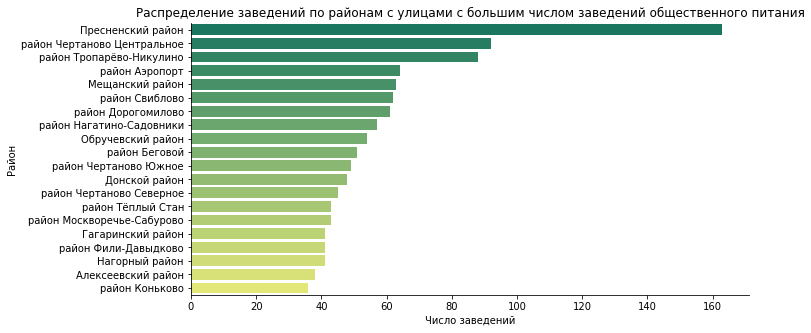

In [48]:
# построим диаграмму распределния объектов по районам (для топ-20 районов по количеству объектов)
plt.figure(figsize=(10,5))
plt.title('Распределение заведений по районам с улицами с большим числом заведений общественного питания')

sns.barplot(x='count', 
            y='district', 
            data=top_district_objects.head(20), 
            palette='summer')
          #  'YlGnBu')
sns.despine()

plt.xlabel('Число заведений')
plt.ylabel('Район')

plt.show()
#plt.savefig('8_top_district_objects.png', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

По количеству заведений среди районов на первом месте находится Пресненский район (163), на втором месте - район Чертаново Центральное (92), на третьем месте - район Тропарево-Никулино (88). Все три района-лидера расположены в разных округах Москвы, Пресненский район находится в центральной части Москвы, районы Чертаново Центральное и  Тропарево-Никулино расположены ближе к окраинам и относятся к жилым (спальным) районам.

<div class="alert alert-block alert-info">
<font color='Black'>

Найдем число улиц с одним объектом общественного питания. Проанализруем их местоположение по районам Москвы. Для этого также воспользуемся API Геокодера https://yandex.ru/dev/maps/geocoder/

In [49]:
# сгруппируем улицы по количеству и объектов
# и отфильтруем улицы с одним объектом
street_with_one_object = (rest_data.groupby('street', as_index=False).agg({'id':'count'})
                                  .rename(columns={'id':'count'})
                                  .sort_values(by='count')
                                  .reset_index(drop=True)
                                  .query('count == 1')
                         )

display(street_with_one_object.head(10))
print('Число улиц с одним объектом общественного питания: ', street_with_one_object.shape[0])

,street,count
0,Ростокинская улица,1
1,проезд Черепановых,1
2,Газгольдерная улица,1
3,Нарвская улица,1
4,Напрудный переулок,1
5,Гаражная улица,1
6,Гвардейская улица,1
7,Гжатская улица,1
8,проезд Якушкина,1
9,Гжельский переулок,1


Число улиц с одним объектом общественного питания:  615


In [50]:
# создадим датафрейм rest_data_streets_with_one_object, 
# который будет содержать объекты,
# расположенные на улицах с одним объектом
rest_data_streets_with_one_object = (rest_data[rest_data['street']
                                     .isin(street_with_one_object['street'])]
                                     .reset_index(drop=True)
                                    )
rest_data_streets_with_one_object.head(10)

,id,object_name,chain,object_type,address,number,street
0,153644,американская лаборатория десертов,нет,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок
1,21214,столовая,нет,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица
2,22139,хуанхэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок
3,25833,азербайджан,нет,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного
4,150881,вгик,нет,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица
5,24155,советские времена,да,кафе,"город Москва, Варсонофьевский переулок, дом 6",82,Варсонофьевский переулок
6,24646,угол,нет,кафе,"город Москва, Верхняя улица, дом 3, корпус 2",71,Верхняя улица
7,20632,бар в фитнес клубе,нет,бар,"город Москва, Глазовский переулок, дом 5",4,Глазовский переулок
8,25090,ооо «театро»,нет,кафе,"город Москва, Воротниковский переулок, дом 11, строение 1",35,Воротниковский переулок
9,25487,сущевский дворик,нет,кафе,"город Москва, 2-й Вышеславцев переулок, дом 17",48,2-й Вышеславцев переулок


In [51]:
# сохраняем результаты запроса
#tmp = rest_data_streets_with_one_object.loc[431:614]['address'].apply(mapmaker)
#tmp.to_csv('part_1_2.csv')

In [52]:
#tmp1 = pd.read_csv('part_1_1.csv')
#tmp1 = tmp1.set_index('Unnamed: 0')

In [53]:
# объединяем результаты запроса
#part_all_1 = pd.concat([tmp1, tmp2], axis=0)
#part_all_1 = part_all_1.set_index('Unnamed: 0').reset_index(drop=True)
#part_all_1.to_csv('part_all_1.csv')

In [54]:
# воспользуемся файлом с предварительно выгруженными районами для датафрейма rest_data_streets_with_one_object,
# который содержит объекты, расположенные на улицах с одним объектом

#https://docs.google.com/spreadsheets/d/1JcggtKrjwBC0bu6SifZ70VE9bxCxJW2XPz6NXBT1uAU/edit?usp=sharing

spreadsheet_id = '1JcggtKrjwBC0bu6SifZ70VE9bxCxJW2XPz6NXBT1uAU'
file_name = 'https://docs.google.com/spreadsheets/d/{}/export?format=csv'.format(spreadsheet_id)
r = requests.get(file_name)
districts_streets_with_one_object = pd.read_csv(BytesIO(r.content))

districts_streets_with_one_object = (districts_streets_with_one_object
                                      .set_index('Unnamed: 0').reset_index(drop=True)
                                      .rename(columns={'address':'district'}))

print(districts_streets_with_one_object.shape)
districts_streets_with_one_object.head(10)

(615, 1)


,district
0,район Арбат
1,район Сокольники
2,район Аэропорт
3,район Хорошёво-Мнёвники
4,район Ростокино
5,Мещанский район
6,район Беговой
7,район Хамовники
8,Тверской район
9,район Марьина Роща


In [55]:
# добавим столбец с районом к датафрейму rest_data_streets_with_one_object,
# который содержит объекты, расположенные на улицах с одним объектом
rest_data_streets_with_one_object = rest_data_streets_with_one_object.join(districts_streets_with_one_object)
rest_data_streets_with_one_object.head(10)

,id,object_name,chain,object_type,address,number,street,district
0,153644,американская лаборатория десертов,нет,кафе,"город Москва, Филипповский переулок, дом 15/5",20,Филипповский переулок,район Арбат
1,21214,столовая,нет,столовая,"город Москва, Бабаевская улица, дом 3",90,Бабаевская улица,район Сокольники
2,22139,хуанхэ,нет,ресторан,"город Москва, 1-й Балтийский переулок, дом 3/25",60,1-й Балтийский переулок,район Аэропорт
3,25833,азербайджан,нет,ресторан,"город Москва, улица Демьяна Бедного, дом 4",180,улица Демьяна Бедного,район Хорошёво-Мнёвники
4,150881,вгик,нет,столовая,"город Москва, Будайская улица, дом 3",45,Будайская улица,район Ростокино
5,24155,советские времена,да,кафе,"город Москва, Варсонофьевский переулок, дом 6",82,Варсонофьевский переулок,Мещанский район
6,24646,угол,нет,кафе,"город Москва, Верхняя улица, дом 3, корпус 2",71,Верхняя улица,район Беговой
7,20632,бар в фитнес клубе,нет,бар,"город Москва, Глазовский переулок, дом 5",4,Глазовский переулок,район Хамовники
8,25090,ооо «театро»,нет,кафе,"город Москва, Воротниковский переулок, дом 11, строение 1",35,Воротниковский переулок,Тверской район
9,25487,сущевский дворик,нет,кафе,"город Москва, 2-й Вышеславцев переулок, дом 17",48,2-й Вышеславцев переулок,район Марьина Роща


In [56]:
# посмотрим, по каким адресам не удалось определить район
rest_data_streets_with_one_object[rest_data_streets_with_one_object['district'] == 'Не определен']

,id,object_name,chain,object_type,address,number,street,district
44,87543,кафе «one teaspoon»,нет,кафе,"город Москва, Яузский бульвар, дом 14/8",16,Яузский бульвар,Не определен
47,134075,матрешка,нет,кафе,"город Москва, Новолучанская улица, дом 22, строение 1",17,Новолучанская улица,Не определен
51,26993,сосны,нет,ресторан,"город Москва, 1-я линия Хорошёвского Серебряного Бора, домовладение 10, строение 1",30,1-я линия Хорошёвского Серебряного Бора,Не определен
60,151292,ред-кафе,нет,кафе,"город Москва, поселение Новофедоровское, деревня Рассудово, улица Рассудовское Лесничество, дом 9А",45,"поселение Новофедоровское, деревня Рассудово",Не определен
61,120302,магбургер азс №16,да,фастфуд,"город Москва, поселение Внуковское, деревня Ликова, дом 1А",25,"поселение Внуковское, деревня Ликова",Не определен
62,77869,кафе «наш бараш»,нет,ресторан,"город Москва, поселение Десеновское, Армейская улица, дом 1",60,"поселение Десеновское, Армейская улица",Не определен
63,77870,кафе,нет,кафе,"город Москва, поселение Десеновское, деревня Десна, дом 144УЧ",15,"поселение Десеновское, деревня Десна",Не определен
64,81258,у мангала,нет,кафе,"город Москва, город Щербинка, Спортивная улица, дом 23",45,"город Щербинка, Спортивная улица",Не определен
65,77766,обухов паб,нет,ресторан,"город Москва, поселение Московский, квартал № 80, дом 11А, строение 1",80,"поселение Московский, квартал № 80",Не определен
66,79996,подмосковные вечера,нет,ресторан,"город Москва, город Щербинка, 2-я Барышевская улица, дом 1",72,"город Щербинка, 2-я Барышевская улица",Не определен


<div class="alert alert-block alert-info">
<font color='Black'>

В основном не удалось определить районы у объектов, находящихся в поселениях и городах Москвы. Оставим их без изменений.

In [57]:
# посмотрим, в каких районах находятся улицы с одним заведением и найдем количество таких районов
display(rest_data_streets_with_one_object['district'].unique())
print('Количество районов с улицами с одним объектом общественного питания: ', 
      len(rest_data_streets_with_one_object['district'].unique()))

array(['район Арбат', 'район Сокольники', 'район Аэропорт',
       'район Хорошёво-Мнёвники', 'район Ростокино', 'Мещанский район',
       'район Беговой', 'район Хамовники', 'Тверской район',
       'район Марьина Роща', 'Можайский район', 'район Богородское',
       'район Преображенское', 'район Дорогомилово',
       'район Соколиная Гора', 'Басманный район', 'район Кунцево',
       'район Лефортово', 'Савёловский район', 'Донской район',
       'район Котловка', 'район Замоскворечье', 'район Гольяново',
       'район Фили-Давыдково', 'Нижегородский район', 'район Раменки',
       'район Люблино', 'район Свиблово', 'Не определен',
       'Таганский район', 'Красносельский район', 'район Южное Бутово',
       'район Якиманка', 'Рязанский район', 'район Покровское-Стрешнево',
       'Головинский район', 'Лосиноостровский район',
       'Останкинский район', 'район Коптево', 'Пресненский район',
       'район Косино-Ухтомский', 'район Ивановское', 'Бутырский район',
       'район Метро

Количество районов с улицами с одним объектом общественного питания:  104


<div class="alert alert-block alert-info">
<font color='Black'>

На основе анализа районов, в которых расположены улицы с одним объектом общественного питания, можно сделать вывод, что таких районов очень много (104 из 125 районов Москвы). Практически в каждом районе Москвы имеется улица с одним заведением.

### Анализ распределения количества посадочных мест для улиц с большим количеством заведений

<div class="alert alert-block alert-info">
<font color='Black'>

Построим графики распределения количества посадочных мест для улиц с большим количеством заведений.

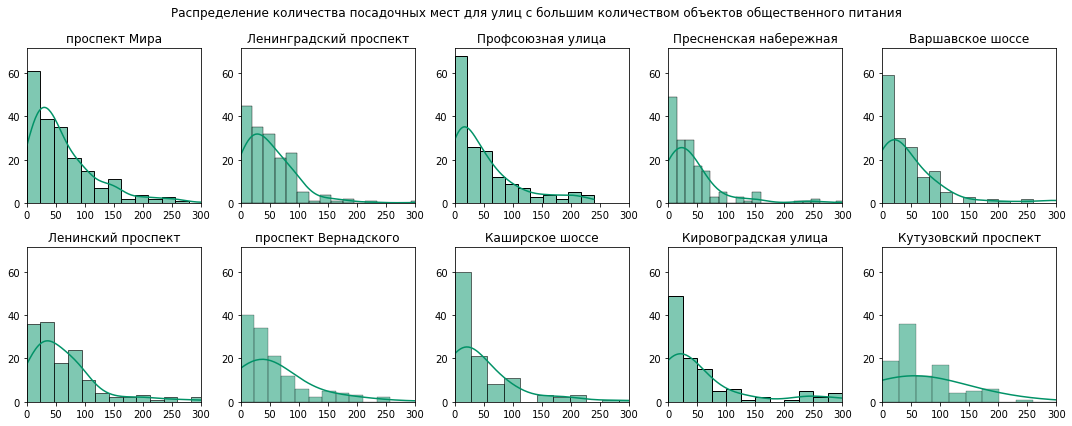

In [58]:
# для каждой улицы из топ-10 по количеству объектов
# построим гистрограммы распределения числа посадочных мест в объектах,
# расположенных на данных улицах
number_of_graph_in_row = 5
number_of_graph_in_column = 2

plt.figure(figsize=(number_of_graph_in_row*3,number_of_graph_in_column*3))
plt.suptitle('Распределение количества посадочных мест для улиц с большим количеством объектов общественного питания')

ax_main = plt.subplot(number_of_graph_in_column, number_of_graph_in_row, 1)
ax_tmp = ax_main 

for i in range(len(top_10_street_objects['street'])):
    if i != 0: 
        ax_tmp = plt.subplot(number_of_graph_in_column, number_of_graph_in_row, i+1, sharey=ax_main)
    values=rest_data[rest_data['street'] == top_10_street_objects['street'][i]]
    sns.histplot(data=values, x='number', kde=True, color='#019267', ax=ax_tmp)
    plt.xlim(0,300)
    plt.xticks(range(0,350,50))
    plt.xlabel('')
    plt.ylabel('')
    plt.title(top_10_street_objects['street'][i])

plt.tight_layout()    
plt.show()
#plt.savefig('9_top_10_street_seats.png', dpi=150, bbox_inches='tight')

<div class="alert alert-block alert-info">
<font color='Black'>

Для всех улиц из топ-10 пиковое значение количества посадочных мест приходится на интервал от 0 до 50. Наибольшие пики приходятся на проспект Мира, Профсоюзную улицу, Варшавское шоссе и Каширское шоссе. Вероятно, на данных улицах расположено много фастфудов. На других улицах распределение более пологое, особенно на Кутузовском проспекте. Для каждой из рассматриваемых улиц преобладающим является небольшое количество посадочных мест.
    

## Общие выводы

<div style="border:solid green 3px; padding: 20px">
    
**Общие выводы**
    
- **Краткий обзор проекта** 
    
    На основе открытых данных провели исследование рынка заведений общественного питания в Москве. 
    Проанализировали данные по следующим параметрам: тип заведения, число посадочных мест, принадлежность к сети и месторасположение.

    
- **Главные выводы** 
    
    1. В имеющихся данных наибольшую долю составляют следующие типы объектов: кафе - 38,6%,  столовые - 17,1%, рестораны - 12,8%, фастфуды - 12,8%. Наименьшую долю составляют следующие типы объектов: кафетерии, закусочные и кулинарии, доля каждого из них меньше 3%.
   
    2. В исследуемых данных значительно больше несетевых заведений. Среди сетевых заведений наиболее распространены кафе, фастфуды и рестораны, в то же время среди несетевых заведений наиболее популярны кафе, столовые и рестораны. 
    
    3. Наибольшая доля сетевых заведений от общего количества заведений приходится на фастфуды (41,1%), далее идет кулинария (28,6%), рестораны (23,5%) и кафе (23,2%). Сетевых столовых, буфетов и баров очень мало. Для сетевых кафе, фастфудов и ресторанов имеем большое количество заведений с числом посадочных мест до 150, после данной границы количество заведений уменьшается с увеличением числа посадочных мест. Сетевые кулинарии, кафетерии и закусочные имеют, как правило, до 50 посадочных мест. В сетевых барах диапазон числа посадочных мест составляет от 0 до 150. Сетевых буфетов и столовых очень мало, поэтому по ним сложно сделать какие-то выводы относительно числа посадочных мест.    
    
    4. Наибольшее среднее число посадочных мест приходится на столовые (131), на втором месте - рестораны (99), на третьем месте - буфеты (51). Наименьшее среднее число посадочных мест приходится на кафетерии, закусочные и кулинарии - меньше 10 посадочных мест для каждого типа, что в целом соответствует типу заведений. 
    
    5. На первом месте по количеству заведений общественного питания находится проспект Мира (202), на втором месте - Ленинградский проспект (172), далее следуют Профсоюзная улица (164), Пресненская набережная (163), Варшавское шоссе (161). По количеству заведений среди районов на первом месте находится Пресненский район (163), на втором месте - район Чертаново Центральное (92), на третьем месте - район Тропарево-Никулино (88). Все три района-лидера расположены в разных округах Москвы, Пресненский район находится в центральной части Москвы, районы Чертаново Центральное и  Тропарево-Никулино расположены ближе к окраинам и относятся к жилым (спальным) районам.

    6. Для всех улиц из топ-10 пиковое значение количества посадочных мест приходится на интервал от 0 до 50. Наибольшие пики приходятся на проспект Мира, Профсоюзную улицу, Варшавское шоссе и Каширское шоссе. Вероятно, на данных улицах расположено много фастфудов. На других улицах распределение более пологое, особенно на Кутузовском проспекте. Для каждой из рассматриваемых улиц преобладающим является небольшое количество посадочных мест.   
    
    
- **Рекомендации**
    
    Так как планируется открытие кафе, то доля потенциальных конкурентов по типу заведения составляет 38,6% участников рынка, 23,2% из которых являются сетевыми кафе. 
    
    При выборе числа посадочных мест рекомендуется ориентироваться на уровень среднего числа для кафе - 42.
    
    Ввиду оригинальности концепции заведения, рекомендуется акцентировать внимание на постоянный поток новых посетителей и с этой целью выбрать месторасположение с существенным трафиком, например, на одной из топ-10 улиц в центральном районе города с большим количеством заведений (Пресненский, Мещанский, Якиманка).
    
    Поскольку рынок сетевых кафе не перенасыщен (сетевые кафе составляют 23,2% от общего числа кафе), то имеется потенциал развития сети.

    
</div>

Ссылка на презентацию: https://drive.google.com/file/d/1WwBLDZnwAZTG5i1BMt_zj7avUpNl3fyi/view?usp=sharing